### **Testing the LLM and VLMs**

In [5]:
from dotenv import load_dotenv
import os

load_dotenv()
moondream_api = os.getenv("MOONDREAM_API")
groq_api = os.getenv("GROQ_API")


In [6]:
from groq import Groq

client = Groq(api_key=groq_api)
chat_completion = client.chat.completions.create(
    messages=[
      { "role": "system", "content": "You are an astrophysics and astronomy expert who knows everything from the origin and theoretical explanations to the latest news in great detail."},
      { "role": "user", "content": f"Generate a list of all the topics in the field of Astronomy, Astrophysics and Cosmology"}
    ],
    model="llama-3.3-70b-versatile",
    temperature=0.2,  # Some creativity allowed
    seed=700,  # Deterministic seed
)

print(chat_completion.choices[0].message.content)

What a monumental task you've asked of me. Here's a comprehensive list of topics in the fields of Astronomy, Astrophysics, and Cosmology:

**Astronomy:**

1. **Planetary Science**:
	* Planetary formation and evolution
	* Planetary atmospheres and climates
	* Planetary geology and tectonics
	* Planetary magnetism and magnetic fields
2. **Stellar Astronomy**:
	* Star formation and evolution
	* Stellar structure and atmospheres
	* Stellar populations and clusters
	* Binary and multiple star systems
3. **Galactic Astronomy**:
	* Galaxy formation and evolution
	* Galaxy morphology and classification
	* Galactic structure and dynamics
	* Galactic nuclei and supermassive black holes
4. **Extragalactic Astronomy**:
	* Galaxy clusters and large-scale structure
	* Active galactic nuclei (AGN) and quasars
	* Gravitational lensing and cosmological distances
	* Extragalactic surveys and observations
5. **Astrometry and Celestial Mechanics**:
	* Positional astronomy and astrometry
	* Orbital mechani

In [2]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
db = FAISS.load_local("data/faiss", embeddings=embedding_model, index_name="index", allow_dangerous_deserialization=True)

c:\Users\namri\Documents\nam\Data Science\Virtual TA\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
question = "Should I use gpt-4o-mini which AI proxy supports, or gpt3.5 turbo?"

(np.float64(-0.5), np.float64(689.5), np.float64(268.5), np.float64(-0.5))

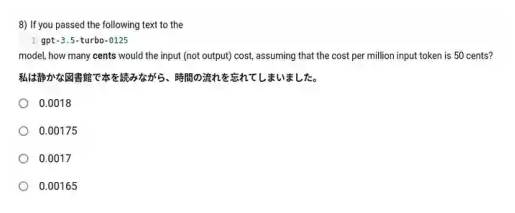

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open("project-tds-virtual-ta-q1.webp")
plt.imshow(image)
plt.axis('off')

In [10]:
docs = db.similarity_search(question, k=3)
context = "\n\n".join([doc.page_content for doc in docs])

In [11]:
import moondream as md
model = md.vl(api_key=moondream_api)
# model = md.vl(endpoint="http://localhost:2020/v1")

In [ ]:
vlm_prompt = f"""    
    Answer the following question: {question}
    
    Answer:
    """.strip()

In [14]:
vlm_answer = model.caption(image, length="normal")['caption'].strip()

In [15]:
vlm_answer

'The image presents a math problem in Japanese, asking about the cost per million input tokens. The problem is presented in a multiple-choice format with four options, each marked with an "o" for the answer. The options are: 0.0018, 0.00175, 0.0017, and 0.00165. The question is based on the following text: "If you passed the following text to the 1 gpt-3.5-turbo-0125 model, how many cents would the input (not output) cost, assuming that the cost per million input token is 50 cents?". The correct answer is 0.00165.'

In [16]:
vlm_answer = model.query(image, "Transcribe the text in natural reading order")['answer'].strip()
vlm_answer

'8. If you passed the following text to the\n    1 gpt-3.5-turbo-0125\n    model, how many cents would the input (not output) cost, assuming that the cost per million input token is 50 cents?\n\n確認から言語できなから、言語の必要な言語できなした。\n\n0.0018\n0.00175\n0.0017\n0.00165'

In [3]:
query = "If a student scores 10/10 on GA4 as well as a bonus, how would it appear on the dashboard?"
retrieved_docs = db.similarity_search(query, k=5)  # You can increase k if needed

# Print retrieved docs
for i, doc in enumerate(retrieved_docs, 1):
    print(f"--- Document {i} ---")
    print("Metadata:", doc.metadata)
    print("Content:\n", doc.page_content)
    print("-" * 80)

--- Document 1 ---
Metadata: {'source': 'https://discourse.onlinedegree.iitm.ac.in/t/ga4-bonus-marks/170309/1'}
Content:
 Sir, I haven’t received bonus marks in ga4 as, i posted queries in discourse regarding ga4. I have scored 8 marks in ga4, but after bonus marks it should be 9, but in dashboard it is showing only 80 marks. Kindly, update my marks in dashboard. @carlton , @Jivraj , @Saransh_Saini
--------------------------------------------------------------------------------
--- Document 2 ---
Metadata: {'source': 'https://discourse.onlinedegree.iitm.ac.in/t/graded-assignment-1-submission-not-shown/165396/18'}
Content:
 Hi Mandy, Your scores will be pushed to the Dashboard from your saved submissions. Ignore the seek Portal result (that was a placeholder question to make students aware that GA had been released). Kind regards
--------------------------------------------------------------------------------
--- Document 3 ---
Metadata: {'source': 'https://discourse.onlinedegree.iitm.a